<h1 size="large"> K-means notebook</h1>


## Simple implmentation using simple dataset

In [64]:
import numpy as np
import matplotlib.pyplot as plt

## Generate dataset

In [89]:
np.random.seed(123)
X1 = np.random.randn(1000,2)
X1[:,0] *= 3
X1 += 10
X2 = np.random.randn(1000,2)
X3 = np.random.randn(1000,2) 
X3[:,1] *= -5
X3[:,0] -= 10
X = np.vstack((X1, X2, X3))

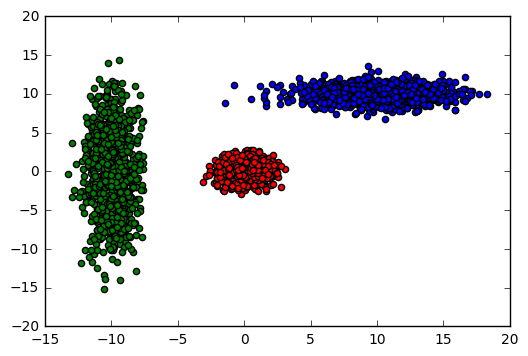

In [91]:
# plot as an example
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1], c='r')
plt.scatter(X3[:,0], X3[:,1], c='g')
plt.show()

In [92]:
def closest_centroid(X, centroids):
    ''' assigns a closest centroid for each datapoint'''
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)
def new_centroids(X, labels, k=2, d=2):
    ''' Makes new centroids given a list of all centroids'''
    centroids = np.zeros((k,d))
    for c in range(k):
        centroids[c] = np.mean(X[labels == c], axis=0)
    return centroids


In [95]:
def kmeans(X, k):
    centroids = X[np.random.randint(0, len(X), k)]
    old_centroids = np.zeros_like(centroids)
    while (centroids != old_centroids).all():
        old_centroids = centroids
        labelled_data = closest_centroid(X, centroids)
        centroids = new_centroids(X, labelled_data, k, X.shape[1])
#         return centroids
    return centroids

In [96]:
centroids = kmeans(X, 3)

### Plotting K-means labels

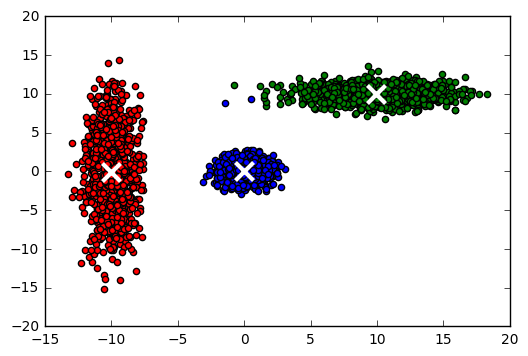

In [97]:
closest = closest_centroid(X, centroids)
colors=  'bgrcmyk'
for c in np.unique(closest):
    subset = X[closest == c]
    plt.scatter(subset[:, 0], subset[:,1], c=colors[c])
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

# K-means with mini - MNIST and sklearn

In [43]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [44]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

## Setup and train K-means
We run PCA first to reduce the data from 64-dimensions (hard to visualize) to 2-dimensions (easy to visualize).

Resources for understanding K-means:
* [Visual Demo [Short]](http://setosa.io/ev/principal-component-analysis/)
* [Detailed Explanation [Long but really good]](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

In [45]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Plotting 

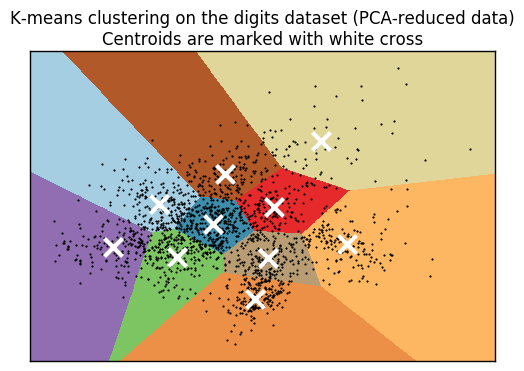

In [47]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()